In [1]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [2]:
# Model configuration
batch_size = 50
img_width, img_height, img_num_channels = 32, 32, 3
loss_function = sparse_categorical_crossentropy
no_classes = 100
no_epochs = 10   # you can increase it to 20,50,70, 100
optimizer = Adam()
verbosity = 1

In [3]:
# Load CIFAR-10 data
(input_train, target_train), (input_test, target_test) = cifar10.load_data()

# Determine shape of the data
input_shape = (img_width, img_height, img_num_channels)


170498071/170498071 [==============================] - 3s 0us/step


In [4]:
# Parse numbers as floats
input_train = input_train.astype('float32')
input_test = input_test.astype('float32')

In [5]:
# Normalize data
input_train = input_train / 255
input_test = input_test / 255

In [6]:
# Create the model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(no_classes, activation='softmax'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 256)               5

In [8]:
# Compile the model
model.compile(loss=loss_function, optimizer=optimizer,metrics=['accuracy'])

In [9]:
# Fit data to model (this will take little time to train)
history = model.fit(input_train, target_train, batch_size=batch_size, epochs=no_epochs, verbose=verbosity)

Epoch 1/10
1000/1000 [==============================] - 9s 4ms/step - loss: 1.5385 - accuracy: 0.4469
Epoch 2/10
1000/1000 [==============================] - 4s 4ms/step - loss: 1.1065 - accuracy: 0.6086
Epoch 3/10
1000/1000 [==============================] - 4s 4ms/step - loss: 0.9394 - accuracy: 0.6707
Epoch 4/10
1000/1000 [==============================] - 4s 4ms/step - loss: 0.8203 - accuracy: 0.7119
Epoch 5/10
1000/1000 [==============================] - 4s 4ms/step - loss: 0.7246 - accuracy: 0.7458
Epoch 6/10
1000/1000 [==============================] - 4s 4ms/step - loss: 0.6364 - accuracy: 0.7754
Epoch 7/10
1000/1000 [==============================] - 4s 4ms/step - loss: 0.5534 - accuracy: 0.8049
Epoch 8/10
1000/1000 [==============================] - 4s 4ms/step - loss: 0.4717 - accuracy: 0.8324
Epoch 9/10
1000/1000 [==============================] - 4s 4ms/step - loss: 0.3963 - accuracy: 0.8594
Epoch 10/10
1000/1000 [==============================] - 4s 4ms/step - loss: 0.333

In [10]:
# Generate generalization metrics
score = model.evaluate(input_test, target_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')


Test loss: 1.1159257888793945 / Test accuracy: 0.6891999840736389


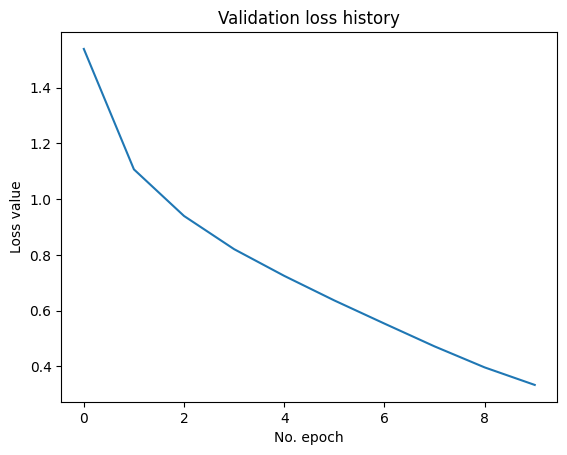

In [11]:
# Visualize history
# Plot history: Loss
plt.plot(history.history['loss'])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

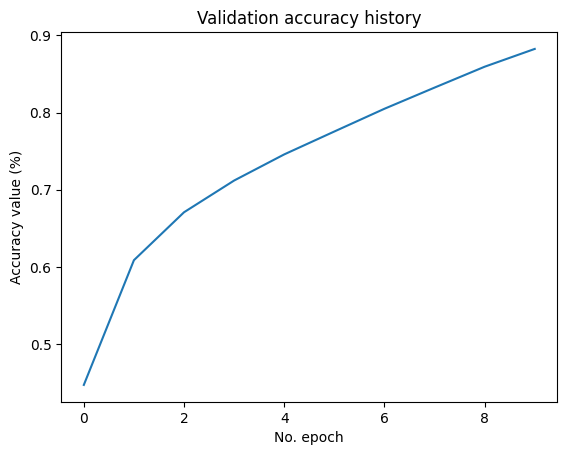

In [12]:
# Plot history: Accuracy
plt.plot(history.history['accuracy'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()

In [13]:
# By Adding k fold cross validation


from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold
KFold

import numpy as np

# Model configuration
batch_size = 50
img_width, img_height, img_num_channels = 32, 32, 3
loss_function = sparse_categorical_crossentropy
no_classes = 100
no_epochs = 10
optimizer = Adam()
verbosity = 1
num_folds = 5

# Load CIFAR-10 data
(input_train, target_train), (input_test, target_test) = cifar10.load_data()

# Determine shape of the data
input_shape = (img_width, img_height, img_num_channels)

# Parse numbers as floats
input_train = input_train.astype('float32')
input_test = input_test.astype('float32')

# Normalize data
input_train = input_train / 255
input_test = input_test / 255

# Define per-fold score containers
acc_per_fold = []
loss_per_fold = []

# Merge inputs and targets
inputs = np.concatenate((input_train, input_test), axis=0)
targets = np.concatenate((target_train, target_test), axis=0)

# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)



In [15]:
# K-fold Cross Validation model evaluation
from tensorflow.keras.optimizers import Adam
fold_no = 1
for train, test in kfold.split(inputs, targets):

  # Define the model architecture
  model = Sequential()
  model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Flatten())
  model.add(Dense(256, activation='relu'))
  model.add(Dense(128, activation='relu'))
  model.add(Dense(no_classes, activation='softmax'))

  # Compile the model
  model.compile(loss=loss_function,
              optimizer=Adam(),
              metrics=['accuracy'])
  model.optimizer.build(model.trainable_variables)

  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')



  # Fit data to model
  history = model.fit(inputs[train], targets[train],
          batch_size=batch_size,
          epochs=no_epochs,
          verbose=verbosity)

  # Generate generalization metrics
  scores = model.evaluate(inputs[test], targets[test], verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  # Increase fold number
  fold_no = fold_no + 1


------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/10
960/960 [==============================] - 6s 4ms/step - loss: 1.5328 - accuracy: 0.4530
Epoch 2/10
960/960 [==============================] - 4s 4ms/step - loss: 1.0958 - accuracy: 0.6141
Epoch 3/10
960/960 [==============================] - 4s 4ms/step - loss: 0.9365 - accuracy: 0.6704
Epoch 4/10
960/960 [==============================] - 4s 4ms/step - loss: 0.8227 - accuracy: 0.7118
Epoch 5/10
960/960 [==============================] - 4s 4ms/step - loss: 0.7246 - accuracy: 0.7480
Epoch 6/10
960/960 [==============================] - 5s 5ms/step - loss: 0.6361 - accuracy: 0.7782
Epoch 7/10
960/960 [==============================] - 4s 4ms/step - loss: 0.5503 - accuracy: 0.8064
Epoch 8/10
960/960 [==============================] - 4s 4ms/step - loss: 0.4720 - accuracy: 0.8338
Epoch 9/10
960/960 [==============================] - 4s 5ms/step - loss: 0.4010 - accuracy: 0.8585
Epo

In [ ]:
#!pip install tensorflow==2.10.0

In [16]:
# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 1.0235648155212402 - Accuracy: 69.9666678905487%
------------------------------------------------------------------------
> Fold 2 - Loss: 1.049593210220337 - Accuracy: 70.96666693687439%
------------------------------------------------------------------------
> Fold 3 - Loss: 0.998224139213562 - Accuracy: 72.09166884422302%
------------------------------------------------------------------------
> Fold 4 - Loss: 1.0421760082244873 - Accuracy: 70.85000276565552%
------------------------------------------------------------------------
> Fold 5 - Loss: 1.0130972862243652 - Accuracy: 70.59999704360962%
------------------------------------------------------------------------
> Fold 6 - Loss: 1.040866494178772 - Accuracy: 69.69166398048401%
------------------------------------------------------------------------
Ave